# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [3]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [4]:
# TODO: Begin your EDA
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   type            1000000 non-null  object 
 1   amount          1000000 non-null  float64
 2   nameOrig        1000000 non-null  object 
 3   oldbalanceOrg   1000000 non-null  float64
 4   newbalanceOrig  1000000 non-null  float64
 5   nameDest        1000000 non-null  object 
 6   oldbalanceDest  1000000 non-null  float64
 7   newbalanceDest  1000000 non-null  float64
 8   isFraud         1000000 non-null  int64  
 9   isFlaggedFraud  1000000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 76.3+ MB


The dataset contains 1,000,000 transactions with 10 columns.All columns have complete data with no missing values. The dataset consists of a mix of numeric and categorical data.

In [5]:
transactions.duplicated().sum()

np.int64(0)

No duplicated columns in the dataset

In [6]:
transactions.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


- The average transaction amount is around 179,620, but amounts vary widely, with a maximum of over 92 million.
- The isFlaggedFraud mean is nearly zero, confirming that only 1 transaction was flagged under the current rule.
- There is a large standard deviation in all amount and balance fields, from very small to extremely large transactions.

## isFlaggedFraud & isFraud Column

In [7]:
# count the number of transactions by isFlaggedFraud
transactions.isFlaggedFraud.value_counts()

isFlaggedFraud
0    999999
1         1
Name: count, dtype: int64

Only 1 transaction FlaggedFraud

In [9]:
# display only flagged transaction:
transactions[transactions['isFlaggedFraud'] == 1]

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
564103,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1


- A single transaction at index 564103 was flagged as fraud. It was correctly identified, as it also has isFraud = 1. The transaction type is TRANSFER. 

- Also ,This looks like  fraudulent transfer attempt, not a completed one.
A fraudster tried to move 536K, and the system caught it. But before money was actually moved, the account was frozen or flagged, so balances remained unchanged and destination account balance is 0.

In [10]:
# count the number of transactions by isFraud
transactions.isFraud.value_counts()

isFraud
0    998703
1      1297
Name: count, dtype: int64

1,297 actual fraudulent transactions

* Upon analyzing the dataset, I observed that only 1 transaction was flagged as Fraud while there are 1,297 actual fraudulent transactions. This indicates that the current rule - flagging transactions only if the amount exceeds 200,000 - is ineffective. This shows that the current rule is not working well — many frauds happen with amounts below 200,000. So, the rule needs to be improved or replaced with a better method to catch more frauds. 

### Type Column

In [11]:
# count the number of transactions by type
transactions.type.value_counts()

type
CASH_OUT    351360
PAYMENT     338573
CASH_IN     219955
TRANSFER     83695
DEBIT         6417
Name: count, dtype: int64

The dataset includes five transaction types, with CASH_OUT (351,360) and PAYMENT (338,573) being the most common. TRANSFER and DEBIT are less frequent

In [12]:
# To identify which transaction types are more prone to fraud
df1 = transactions[transactions['isFraud'] == 1]['type']
df1


439       CASH_OUT
982       TRANSFER
1084      CASH_OUT
1903      TRANSFER
1912      TRANSFER
            ...   
997527    TRANSFER
997654    CASH_OUT
998488    TRANSFER
998998    CASH_OUT
999387    TRANSFER
Name: type, Length: 1297, dtype: object

A new DataFrame df1 was created by filtering only rows where isFraud = 1. This subset contains all fraudulent transactions, allowing for focused analysis on fraud patterns and behaviors.

In [13]:
# count the number of Frauds by type
df1.value_counts()

type
CASH_OUT    657
TRANSFER    640
Name: count, dtype: int64

Among all transaction types, CASH_OUT and TRANSFER are responsible for all 1,297 fraud cases, with CASH_OUT having 657 and TRANSFER 640. This shows that fraudulent activity is concentrated entirely within these two types, making them key targets for fraud detection efforts.

###  Amount Column

In [14]:
# Analysing amount column vs ('type',isFraud','isFlaggedFraud')
df2 = transactions[['amount','type','isFraud','isFlaggedFraud']]
df2

,amount,type,isFraud,isFlaggedFraud
0,983.09,PAYMENT,0,0
1,55215.25,PAYMENT,0,0
2,220986.01,CASH_IN,0,0
3,2357394.75,TRANSFER,0,0
4,67990.14,CASH_OUT,0,0
...,...,...,...,...
999995,13606.07,PAYMENT,0,0
999996,9139.61,PAYMENT,0,0
999997,153650.41,CASH_OUT,0,0
999998,163810.52,CASH_OUT,0,0


A new DataFrame df2 was created to analyze the relationship between transaction amount and the fraud indicators isFraud and isFlaggedFraud. This allows us to explore whether higher transaction amounts are more likely to be fraudulent or flagged by the system.

In [15]:
# check whether these high-value transactions are actually flagged as fraud or not

df2[(df2['amount'] > 200000) & (df2['isFlaggedFraud'] == 0)]

,amount,type,isFraud,isFlaggedFraud
2,220986.01,CASH_IN,0,0
3,2357394.75,TRANSFER,0,0
12,291518.16,CASH_IN,0,0
13,289136.25,CASH_OUT,0,0
16,223183.45,CASH_IN,0,0
...,...,...,...,...
999982,214013.50,CASH_OUT,0,0
999986,238572.38,CASH_OUT,0,0
999987,210659.35,CASH_IN,0,0
999988,1163183.69,TRANSFER,0,0


   - Out of the 262,434 transactions with an amount greater than 200000- 262,433 were not considered fraudulent (isFraud = 0). This shows that high amount alone is not enough to label a transaction as fraud, indicating that the fraud detection logic likely considers additional conditions beyond just the transaction amount.

 - Since we already found that the only flagged fraud case was of type TRANSFER, it suggests that isFlaggedFraud may consider multiple conditions, not just amount > 200,000 and transaction type = TRANSFER, but possibly also cases where the entire account balance is transferred (i.e., the remaining balance is zero). This indicates that additional logic beyond just amount and type might be used to flag a transaction as potentially fraudulent.

## oldbalanceOrg	& newbalanceOrig	

In [16]:
df3 = transactions[['oldbalanceOrg','newbalanceOrig','isFraud','isFlaggedFraud']]
df3

,oldbalanceOrg,newbalanceOrig,isFraud,isFlaggedFraud
0,36730.24,35747.15,0,0
1,99414.00,44198.75,0,0
2,7773074.97,7994060.98,0,0
3,0.00,0.00,0,0
4,0.00,0.00,0,0
...,...,...,...,...
999995,114122.11,100516.04,0,0
999996,0.00,0.00,0,0
999997,50677.00,0.00,0,0
999998,0.00,0.00,0,0


A new DataFrame df3 was created to include only the original account balances before and after the transaction: oldbalanceOrg and newbalanceOrig. This helps analyze how the sender's balance changes during transactions, which can be useful for detecting unusual patterns in fraudulent activity

In [17]:

# droping rows with 0 balance
df3 = df3[df3['oldbalanceOrg'] != 0.00] 
df3

,oldbalanceOrg,newbalanceOrig,isFraud,isFlaggedFraud
0,36730.24,35747.15,0,0
1,99414.00,44198.75,0,0
2,7773074.97,7994060.98,0,0
6,11049.00,0.00,0,0
8,584.00,0.00,0,0
...,...,...,...,...
999993,115514.06,106723.76,0,0
999994,477.00,73248.22,0,0
999995,114122.11,100516.04,0,0
999997,50677.00,0.00,0,0


Rows with an original balance of 0.00 were removed from the df3 DataFrame using a filter condition. This helps focus the analysis on transactions where the sender had an existing balance, potentially revealing more meaningful patterns related to fraud.

In [18]:
# checking fraud
df3[df3['isFraud'] == 1]

,oldbalanceOrg,newbalanceOrig,isFraud,isFlaggedFraud
439,530354.58,0.0,1,0
982,5429153.98,0.0,1,0
1084,834592.40,0.0,1,0
1903,2763398.31,0.0,1,0
1912,296699.39,0.0,1,0
...,...,...,...,...
997527,2571605.04,0.0,1,0
997654,1421665.98,0.0,1,0
998488,349627.64,0.0,1,0
998998,1749325.14,0.0,1,0


In [19]:
# check common ending balances for the sender’s account
df3['newbalanceOrig'].value_counts()

newbalanceOrig
0.00         238203
9049.86           3
25671.79          3
15050.72          3
1298.02           3
              ...  
7874.76           1
460165.08         1
106723.76         1
73248.22          1
56384.24          1
Name: count, Length: 429154, dtype: int64

The value counts for the newbalanceOrig column show that 238,203 transactions resulted in a new balance of 0.00, indicating full withdrawal of funds. This is significantly higher than any other ending balance, suggesting that complete balance transfers are a common behavior, which may be linked to potential fraudulent activity.

## oldbalanceDest & newbalanceDest

In [20]:
df4 = transactions[['oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']]
df4 

,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.00,0.00,0,0
1,0.00,0.00,0,0
2,924031.48,703045.48,0,0
3,4202580.45,6559975.19,0,0
4,625317.04,693307.19,0,0
...,...,...,...,...
999995,0.00,0.00,0,0
999996,0.00,0.00,0,0
999997,0.00,380368.36,0,0
999998,357850.15,521660.67,0,0


In [21]:
# droping rows with 0 new balance
df4 = df4[df4['newbalanceDest'] != 0.00] 
df4

,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,924031.48,703045.48,0,0
3,4202580.45,6559975.19,0,0
4,625317.04,693307.19,0,0
6,0.00,36932.75,0,0
8,183521.42,321367.00,0,0
...,...,...,...,...
999989,2908302.77,3151748.34,0,0
999994,2071943.36,1999172.15,0,0
999997,0.00,380368.36,0,0
999998,357850.15,521660.67,0,0


Rows with a newbalanceDest of 0.00 were removed from the df4 DataFrame to focus on transactions where the destination account actually received funds. This helps eliminate cases where no money was credited, which may include failed, fraudulent, or incomplete transactions.

In [22]:
# displays the frequency of ending balances in destination fraud accounts 
df4[df4['isFraud'] == 1]['newbalanceDest'].value_counts()

newbalanceDest
10000000.00    7
5259138.09     1
1071020.75     1
841052.98      1
44482.33       1
              ..
86002.09       1
132943.98      1
195418.90      1
1421665.98     1
8875183.40     1
Name: count, Length: 651, dtype: int64

In transactions, most destination account balances appear only once, but the balance 10,000,000.00 shows up 7 times, more than any other value. 

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Answer here

In [23]:
# List of numeric columns
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


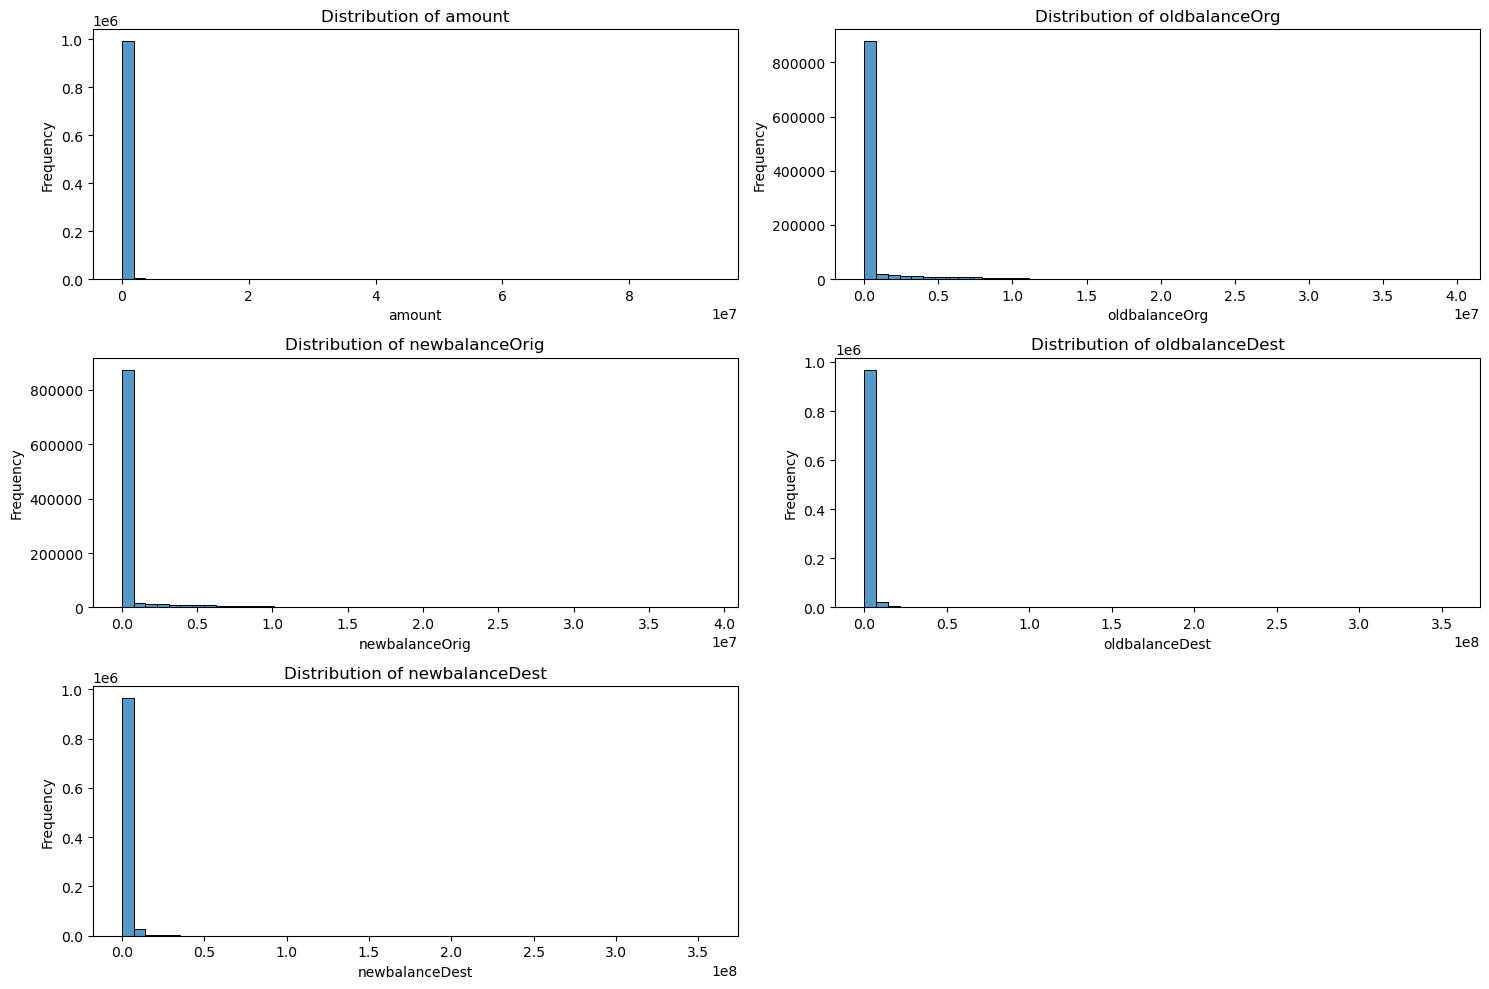

In [24]:
# Create subplots
plt.figure(figsize=(15, 10))


for i, col in enumerate(numeric_cols,1): # Loop through each column, index starting 1
    plt.subplot(3, 2, i)  # 3 rows, 2 columns of subplots 
    sns.histplot(transactions[col], bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')



plt.tight_layout()
plt.show()

The histograms for the numeric columns do not provide meaningful insights in their current form. Most values are tightly packed in a single bar near zero, while a few extreme values stretch the x-axis, making the charts visually unbalanced and hard to interpret. This suggests the data is heavily right-skewed, and to better visualize the distributions, Use a log scale on the x-axis.

/opt/miniconda3/envs/ds/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/miniconda3/envs/ds/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/miniconda3/envs/ds/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/miniconda3/envs/ds/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/miniconda3/envs/ds/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


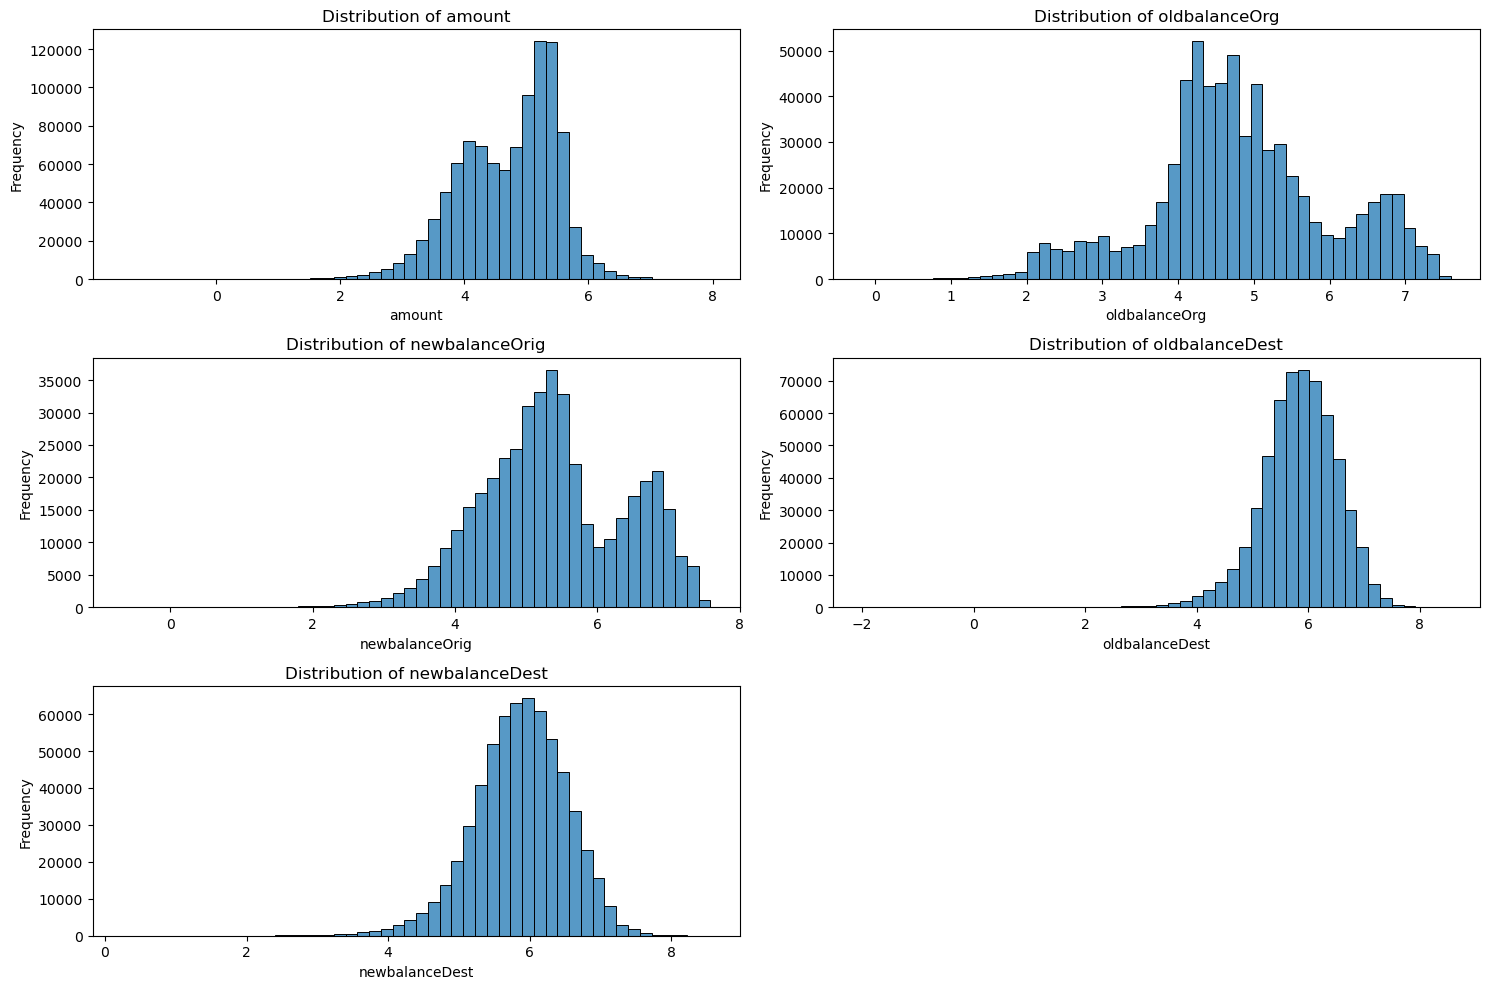

In [ ]:

# Create subplots
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1): # Loop through each column, index starting 1
    plt.subplot(3, 2, i)  # 3 rows, 2 columns of subplots
    sns.histplot(np.log10(transactions[col]), bins=50) # log 10

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


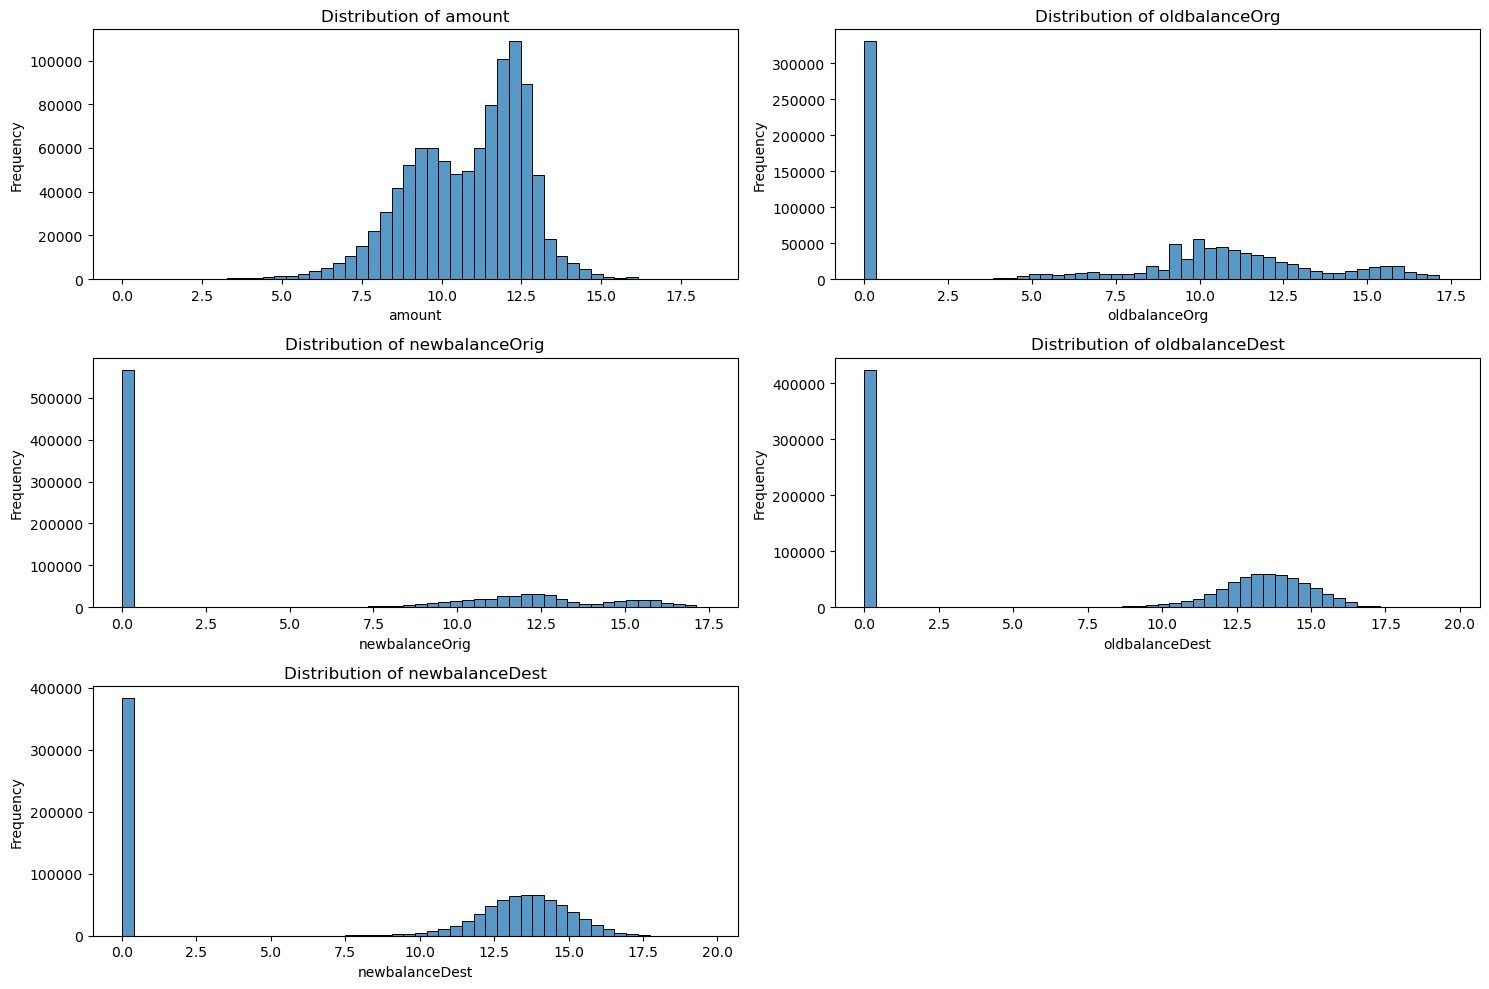

In [27]:
# Create subplots
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1): # Loop through each column, index starting 1
    plt.subplot(3, 2, i)  # 3 rows, 2 columns of subplots
    sns.histplot(np.log1p(transactions[col]), bins=50) # avoid div by 0

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Answer:

The most transactions involve small amounts and low balances, while a few rare transactions involve very large values. After applying a log transformation, we can see that a significant portion of the data clusters at the lower end (especially around 0), while the remaining values are spread out across a higher range.



_________________________

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here

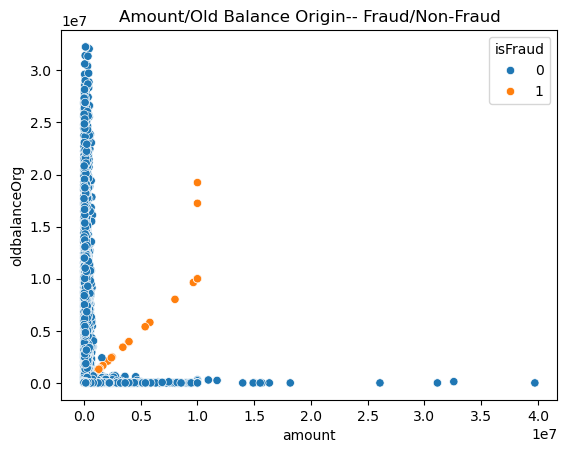

In [28]:
# scatterplot -  amount vs oldbalanceOrg
sns.scatterplot(data=transactions.sample(50000),
                x='amount', y='oldbalanceOrg',
                hue='isFraud')
plt.title('Amount/Old Balance Origin-- Fraud/Non-Fraud')
plt.show()

The scatter plot compares transaction amount with the sender’s original balance (oldbalanceOrg), highlighting fraudulent and non-fraudulent transactions. Fraudulent transactions tend to align closely along the diagonal line where the amount is nearly equal to the original balance, suggesting that fraudsters often transfer the full account balance. In contrast, non-fraudulent transactions are more widely scattered across all value ranges. 

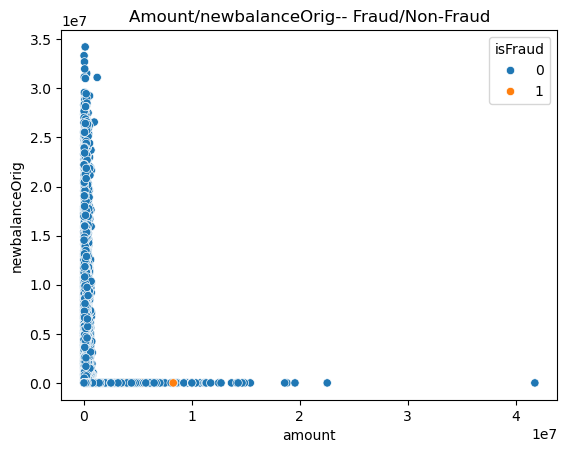

In [31]:
# scatterplot -  amount vs newbalanceOrig
sns.scatterplot(data=transactions.sample(50000),
                x='amount', y='newbalanceOrig',
                hue='isFraud')
plt.title('Amount/newbalanceOrig-- Fraud/Non-Fraud')
plt.show()

This scatter plot compares the transaction amount with the sender's balance after the transaction (newbalanceOrig). Most of the fraud cases happen when the account balance becomes zero, meaning the entire amount was taken out. Normal transactions show more variety in remaining balances. This suggests that when someone's account is completely emptied, it could be a sign of fraud.

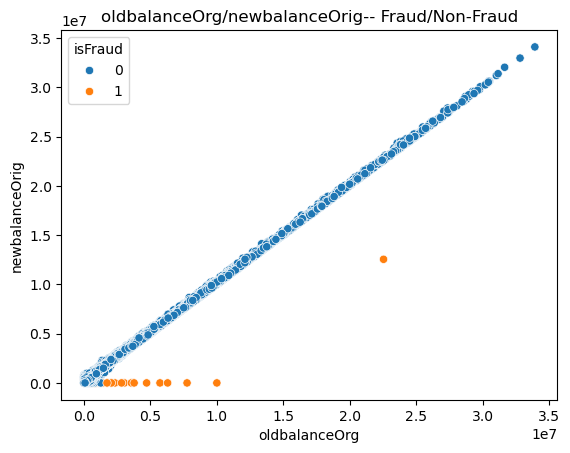

In [32]:
# scatterplot - oldbalanceOrg  vs newbalanceOrig
sns.scatterplot(data=transactions.sample(50000),
                x='oldbalanceOrg', y='newbalanceOrig',
                hue='isFraud')
plt.title('oldbalanceOrg/newbalanceOrig-- Fraud/Non-Fraud')
plt.show()

This scatter plot compares the original account balance (oldbalanceOrg) with the balance after the transaction (newbalanceOrig). Most non-fraudulent transactions follow a straight line where the old and new balances are nearly the same, indicating that no money was withdrawn. In contrast, fraudulent transactions are mostly found where the new balance is zero, suggesting that the entire account balance was emptied, which is a common sign of fraudulent behavior.

____________________

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

In [33]:
# summary stat
transactions[['type','amount']].describe(include='all')

,type,amount
count,1000000,1.000000e+06
unique,5,NaN
top,CASH_OUT,NaN
freq,351360,NaN
mean,NaN,1.796208e+05
std,NaN,6.076181e+05
min,NaN,0.000000e+00
25%,NaN,1.336939e+04
50%,NaN,7.443500e+04
75%,NaN,2.083404e+05


In [34]:
# get average amount per type
avg = transactions.groupby('type')['amount'].mean().reset_index().sort_values('amount', ascending=False)
avg

,type,amount
4,TRANSFER,911827.155179
1,CASH_OUT,175584.659320
0,CASH_IN,168928.914668
3,PAYMENT,13055.592085
2,DEBIT,5445.890813


The average transaction amount varies significantly by type. TRANSFER transactions have the highest average amount at around 911,827, followed by CASH_OUT and CASH_IN with averages around 175,000 and 168,000 respectively. In contrast, PAYMENT and DEBIT transactions involve much smaller amounts on average, with 13,055 and 5,446 respectively.

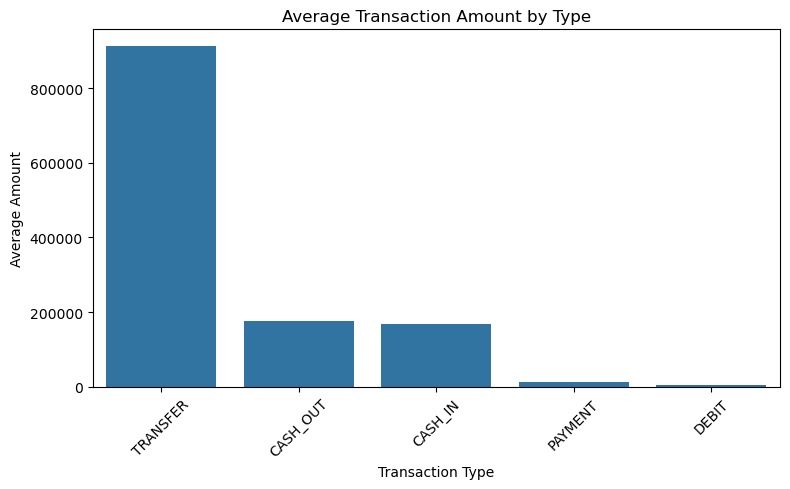

In [35]:
# plotting the bar chart

plt.figure(figsize=(8, 5))
sns.barplot(data=avg, x='type', y='amount')
plt.title('Average Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


A bar chart was created to show the average transaction amount by type. The graph reveals that TRANSFER transactions have the highest average amount, followed by CASH_OUT and CASH_IN. On the other hand, PAYMENT and DEBIT transactions involve significantly smaller average amounts. 

______________________

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

In [36]:
# calculate average amount by type and fraud status
Fraud_avg = transactions.groupby(['type','isFraud'])['amount'].mean().reset_index().sort_values('amount', ascending=False)
Fraud_avg


,type,isFraud,amount
6,TRANSFER,1,1.384176e+06
2,CASH_OUT,1,1.326971e+06
5,TRANSFER,0,9.081874e+05
1,CASH_OUT,0,1.734277e+05
0,CASH_IN,0,1.689289e+05
4,PAYMENT,0,1.305559e+04
3,DEBIT,0,5.445891e+03


Fraudulent transactions in TRANSFER and CASH_OUT types have significantly higher average amounts (over 1.3 million) compared to their non-fraudulent counterparts. In contrast, PAYMENT, DEBIT, and CASH_IN types appear only in non-fraud cases and involve much smaller amounts. This suggests that fraud is more likely to occur in high-value transfers and cash-outs.

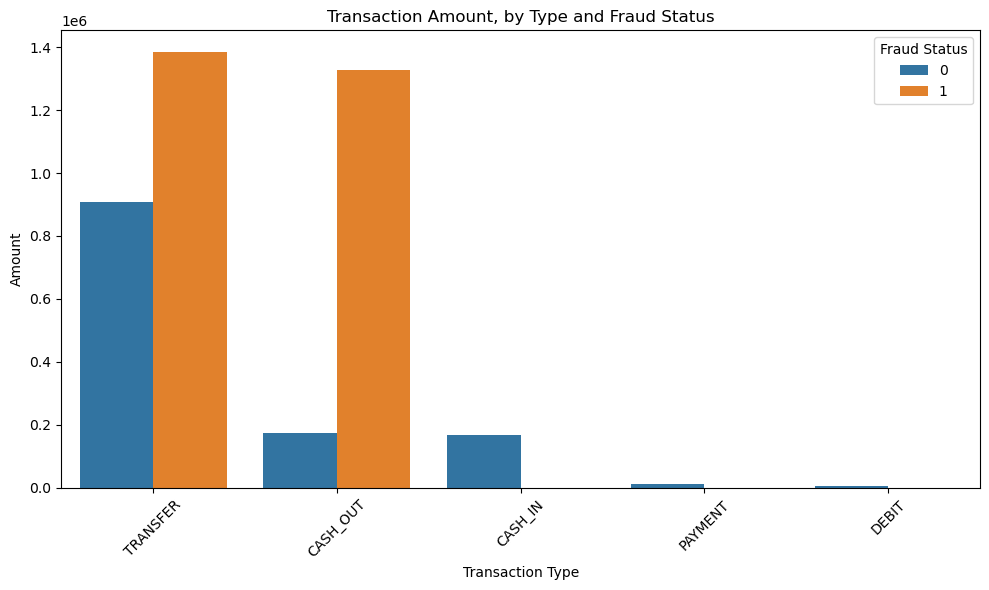

In [37]:
# Bar Plot

plt.figure(figsize=(10, 6))
sns.barplot(data=Fraud_avg, x='type', y='amount', hue='isFraud')
plt.title('Transaction Amount, by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.legend(title='Fraud Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



The bar chart shows that fraudulent transactions are concentrated in TRANSFER and CASH_OUT types, with significantly higher average amounts than non-fraudulent ones. Other types like CASH_IN, PAYMENT, and DEBIT are mostly non-fraudulent and involve smaller amounts. This indicates fraud is more likely in high-value, money-moving transactions.

____________

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here

From the exploratory data analysis, 

Out of 1,297 actual frauds, only 1 transaction was flagged by the system. The flag triggers only when:type = TRANSFER and amount > 200,000.Even when these conditions are met, many frauds are still not flagged.

Most frauds happen in TRANSFER and CASH_OUT types. Fraudulent transactions often involve full balance withdrawal, leaving newbalanceOrig = 0. These patterns are not captured by the current rule.

it's clear that the system's built-in fraud flag (isFlaggedFraud) performs poorly in detecting actual fraud (isFraud). While fraud mostly occurs in TRANSFER and CASH_OUT transactions involving high amounts, the flag is only triggered under very specific conditions — such as when the amount exceeds 200,000 and the type = Transfer. As a result, most actual frauds are not flagged, especially those in CASH_OUT type or involving full balance withdrawals that fall just below the threshold.

